In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('womens-clothing-clean.csv')

# Modelling

### Feature Engineering

In [134]:
data.head(1)

,Unnamed: 0,Unnamed: 0.1,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review length,Clean Review,Clean Review Length,Meaningfull Words,Meaningfull Words Str
0,0,0,767,33,silky sexy wonderful,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,absolutely wonderful silky and sexy and comfor...,51,"['silky', 'sexy', 'wonderful']",silky sexy wonderful


In [124]:
x=pd.get_dummies(data.drop(['Recommended IND','Unnamed: 0', 'Title', 'Review Text','Clean Review','Clean Review Length','Meaningfull Words', 'Meaningfull Words Str'],axis=1))
y=data['Recommended IND']

In [135]:
x.head(0)

,Unnamed: 0.1,Clothing ID,Age,Rating,Positive Feedback Count,Review length,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend


### Handling Imbalanced Data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [6]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

### Table Scoring

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [137]:
#Test Scoring

list_sample = ['undersampling', 'ros', 'smote', 'class_weight']
list_model = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier]
index_model=['LogisticRegression 0','LogisticRegression 1','DecisionTreeClassifier 0','DecisionTreeClassifier 1','RandomForestClassifier 0','RandomForestClassifier 1','GradientBoostingClassifier 0', 'GradientBoostingClassifier 1']

#Undersampling:

minority_data = data[data['Recommended IND']==0]
mayority_data = data[data['Recommended IND']==1]
index_for_mayority = np.random.choice(mayority_data.index, len(minority_data))
data_class_0 = data.loc[index_for_mayority]
undersampling_data = pd.concat([data_class_0, minority_data])
x_under=pd.get_dummies(undersampling_data.drop(['Recommended IND','Unnamed: 0', 'Title', 'Review Text','Clean Review','Clean Review Length','Meaningfull Words', 'Meaningfull Words Str'],axis=1))
y_under=undersampling_data['Recommended IND']

US_precision = []
US_recall = []
for i,item in enumerate(list_model):
    X_tr, X_ts, y_tr, y_ts=train_test_split(x_under,y_under,random_state=101)
    US_model=item()
    US_model.fit(X_tr, y_tr)
    US_predict=US_model.predict(X_ts)
    US_predict_train=US_model.predict(X_tr)
    aa=confusion_matrix(y_ts, US_predict)

    #precision 0
    pre_0=round((aa[0][0])/((aa[0][0])+(aa[1][0])),2)
    US_precision.append(pre_0)

    #precision 1(berasal dari true positif):
    pre_1=round((aa[1][1])/((aa[1][1])+(aa[0][1])),2)
    US_precision.append(pre_1)

    #recall 0:
    rec_0=round((aa[0][0])/((aa[0][0])+(aa[0][1])),2)
    US_recall.append(rec_0)

    #recall 1:
    rec_1=(round((aa[1][1])/((aa[1][1])+(aa[1][0])),2))
    US_recall.append(rec_1)
US={'US precision':US_precision, 'US recall':US_recall}
US=pd.DataFrame(US,index=index_model )


#ROS :

ROS_precision = []
ROS_recall = []
for i,item in enumerate(list_model):
    X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=101)
    ROS_model = item()
    ros = RandomOverSampler(random_state=101)
    X_ros, y_ros = ros.fit_sample(X_train,y_train)
    ROS_model.fit(X_ros,y_ros)
    ROS_predict_train=ROS_model.predict(X_ros)
    ROS_predict=ROS_model.predict(X_test)
    bb=confusion_matrix(y_test, ROS_predict)
    
    
    #precision 0
    pre_0=round((bb[0][0])/((bb[0][0])+(bb[1][0])),2)
    ROS_precision.append(pre_0)

    #precision 1(berasal dari true positif):
    pre_1=round((bb[1][1])/((bb[1][1])+(bb[0][1])),2)
    ROS_precision.append(pre_1)

    #recall 0:
    rec_0=round((bb[0][0])/((bb[0][0])+(bb[0][1])),2)
    ROS_recall.append(rec_0)

    #recall 1:
    rec_1=(round((bb[1][1])/((bb[1][1])+(bb[1][0])),2))
    ROS_recall.append(rec_1)
    
ROS={'ROS precision':ROS_precision, 'ROS recall':ROS_recall}
ROS=pd.DataFrame(ROS,index=index_model )

    
#SMOTE :

SMOTE_precision = []
SMOTE_recall = []
for i,item in enumerate(list_model):
    X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=101)
    SMOTE_model = item()
    sm = SMOTE(random_state=101)
    X_sm, y_sm = sm.fit_sample(X_train,y_train)
    SMOTE_model.fit(X_sm,y_sm)
    SMOTE_predict=SMOTE_model.predict(X_test)
    SMOTE_predict_train=SMOTE_model.predict(X_sm)
    cc=confusion_matrix(y_test, SMOTE_predict)
    
    
    #precision 0
    pre_0=round((cc[0][0])/((cc[0][0])+(cc[1][0])),2)
    SMOTE_precision.append(pre_0)

    #precision 1(berasal dari true positif):
    pre_1=round((cc[1][1])/((cc[1][1])+(cc[0][1])),2)
    SMOTE_precision.append(pre_1)

    #recall 0:
    rec_0=round((cc[0][0])/((cc[0][0])+(cc[0][1])),2)
    SMOTE_recall.append(rec_0)

    #recall 1:
    rec_1=(round((cc[1][1])/((cc[1][1])+(cc[1][0])),2))
    SMOTE_recall.append(rec_1)
    
SMOTE={'SMOTE precision':SMOTE_precision, 'SMOTE recall':SMOTE_recall}
SMOTE=pd.DataFrame(SMOTE,index=index_model)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TypeError: 'DataFrame' object is not callable

- Accuracy Test:

In [19]:
US_accuracytest = accuracy_score(y_ts, US_predict)
ROS_accuracytest = accuracy_score(y_test, ROS_predict)
SMOTE_accuracytest=accuracy_score(y_test, SMOTE_predict)

US_accuracytrain = accuracy_score(y_tr, US_predict_train)
ROS_accuracytrain = accuracy_score(y_ros, ROS_predict_train)
SMOTE_accuracytrain=accuracy_score(y_sm, SMOTE_predict_train)


accuracy_train = [US_accuracytrain,ROS_accuracytrain,SMOTE_accuracytrain]
accuracy_test = [US_accuracytest, ROS_accuracytest, SMOTE_accuracytest]
accuracy = [accuracy_train, accuracy_test]
pd.DataFrame(data=accuracy, columns=['Undersampling', 'RandomOverSampling', 'SMOTE'], index=['Accuracy Train Score', 'Accuracy Test Score'])

,Undersampling,RandomOverSampling,SMOTE
Accuracy Train Score,0.945700,0.943008,0.959785
Accuracy Test Score,0.949293,0.935655,0.936008


#### Based on the accuracy, the balance between train and test is Undersampling. otherwise the train smote is best score

- Test Scoring Precision and Recall

In [18]:
test_scoring_df = pd.concat([US,ROS,SMOTE], axis=1)
test_scoring_df

,US precision,US recall,ROS precision,ROS recall,SMOTE precision,SMOTE recall
LogisticRegression 0,0.94,0.96,0.75,0.96,0.76,0.95
LogisticRegression 1,0.96,0.94,0.99,0.93,0.99,0.93
DecisionTreeClassifier 0,0.94,0.96,0.77,0.75,0.75,0.76
DecisionTreeClassifier 1,0.96,0.94,0.95,0.95,0.95,0.94
RandomForestClassifier 0,0.93,0.96,0.76,0.90,0.77,0.89
RandomForestClassifier 1,0.96,0.93,0.98,0.94,0.98,0.94
GradientBoostingClassifier 0,0.94,0.96,0.75,0.96,0.75,0.95
GradientBoostingClassifier 1,0.96,0.94,0.99,0.93,0.99,0.93


#### Based on the model the best score is using under_sampling. 3 models have same best score which is Logreg, DTC, and GBC. i pick up the best first which is Logreg

# Optimization model using GridSearch

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
#state model
lr= LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(x_under, y_under)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Best Penalty: l1
Best C: 2.7825594022071245


In [22]:
lr_optim = LogisticRegression(penalty='l1', C=2.7825594022071245)
lr_optim.fit(X_tr, y_tr)
prediction_optim=US_model.predict(X_ts)
print(confusion_matrix(y_ts, prediction_optim))
print(classification_report(y_ts, prediction_optim))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[993  39]
 [ 65 954]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1032
           1       0.96      0.94      0.95      1019

   micro avg       0.95      0.95      0.95      2051
   macro avg       0.95      0.95      0.95      2051
weighted avg       0.95      0.95      0.95      2051



###  Simple Predict (actual vs prediction)

In [23]:
y_ts.iloc[680]

1

In [71]:
predict_data = US_model.predict([X_ts.iloc[680].values])[0]
predict_data

1

### Feature Important

In [138]:
lr_optim.fit(X_tr, y_tr)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [140]:
len(X_tr.columns)

34

In [141]:
len(lr_optim.coef_[0])

34

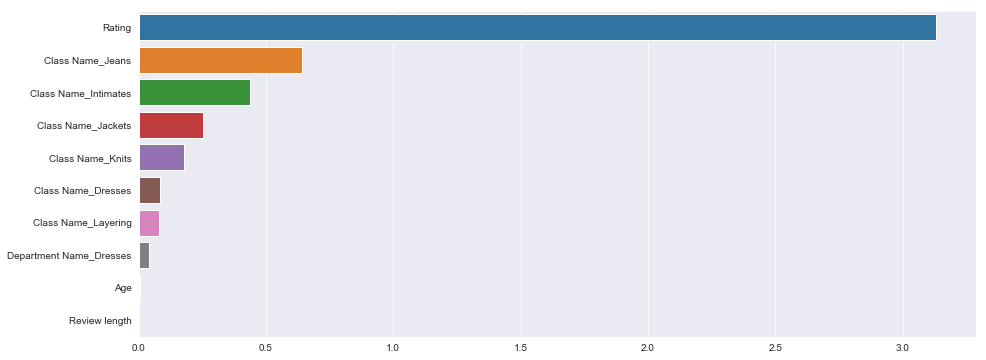

In [143]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,6))
feature = pd.Series(lr_optim.coef_[0], index = X_tr.columns).sort_values(ascending=False).head(10)
sns.barplot(x = feature.values, y = feature.index)

In [111]:
feature = lr_optim.coef_

In [125]:
feature

array([[-8.47154344e-06, -6.17759934e-04,  8.92204846e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [88]:
#x.head()

In [67]:
#US_LR=LogisticRegression()

In [69]:
#score = pd.DataFrame(US_LR.fit(X_tr, y_tr).coef_,columns=['Score'])
#score['Column']=x.columns

# The Curve

# Export CSV

In [144]:
import pickle

In [145]:
filename = 'finalized_model.sav'
pickle.dump(lr_optim, open(filename, 'wb'))

In [146]:
filename = 'x_dummies_colomn.sav'
pickle.dump(x.columns, open(filename , 'wb'))

In [147]:
filename = 'real_colomn.sav'
pickle.dump(data.drop('Recommended IND',axis=1).columns, open(filename , 'wb'))